#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

### Student Info
<b>Name:</b> Kutub uddin<br>
<b>Reg. No:</b> 170103020047

### Assignment 1: Perceptron 
<b>This assignment contains four tasks</b><br>
Perceptron is the first neural network model that can learn from data, invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. 

* Linear classifier.
* Binary or bipolar data
\begin{equation}
  \hat y=
  \begin{cases}
    1, &  \sum_{i}^{m} w_i.x_i+b> 0  \\
    -1, & \text{otherwise}
  \end{cases}
\end{equation}

Or, we can write [for a single data vector= x, weight vector=w and bias=b]
\begin{equation}
  z=x.w+b\\
  \hat y=sign(z)
\end{equation}

Or, we can simplify,
\begin{equation}
  z=X.W^T\\
  \hat y=sign(z)
\end{equation}
where X=data (NxD), W=weight vector(1xD) , b=bias(1x1)

In [117]:
import numpy as np
import matplotlib.pyplot as plt


In [118]:
X=np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
y=np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

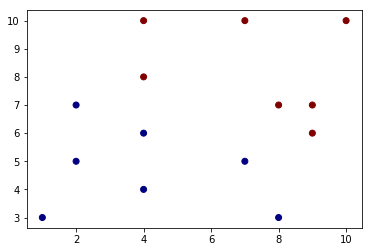

In [119]:
plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')   
plt.show()

<b>Task_1: calculate output and plot the data</b><br>
Given, w=[-2.0, 0.4, 0.1], calculate output $\hat y$ <br> <b>note:</b> w[0]=bias<br>
 
* Output should be, $\hat y=[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]$
* Note: variable XX contains 1 in the first column and the rest is same as X. This will remove the necessity of useing seperate bias.

In [120]:
w=[-2.0, 0.4, 0.1]
XX=np.c_[np.ones(X.shape[0]), X]  #add column with value 1 in the first column. to remove the need of separate bias
print(XX[:4])

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]]


In [121]:
#your code goes here.
def liner_reg(XX,w):
    val=0
    for i,j in zip(XX,w):
        val+=np.dot(i,j)
    return val

In [122]:
def sign(lr):
    if(round(lr,1)>0.0):
        return 1.0
    
    else:
        return -1.0
    

In [123]:
def pred(XX, w):
    hp=[]
    for i in XX: 
        lr=liner_reg(i,w)
        
        h=sign(lr)
        hp.append(h)
    return hp

In [124]:
y_head=pred(XX,w)
print(y_head)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0]


<b>Plotting the hyperplane</b>

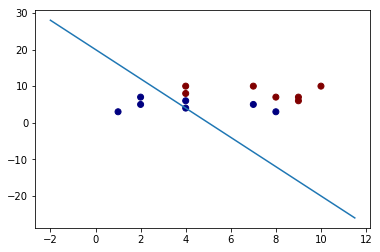

In [125]:
w=[-2.0, 0.4, 0.1]

nx=np.arange(-2,12,0.5)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

<b>Task_2: Update check</b>
Let's choose a missclassified data,  $rx=[1, 4,6], ry=-1$ <br>
Update rule: $w=w+ \eta(ry*rx)$  <br>
Where, learning rate $0> \eta \leq 1$ <br>
Let, $\eta=0.1$  <br>
* update w for the data. w should be [-2.1,  0. , -0.5]

In [126]:
#your code goes here.
rx=np.array([1,4,6])
ry=-1
eta=0.1
#final equation w=w-(learning_rate*rx)
w=w-eta*rx
print(w)




[-2.1  0.  -0.5]


<b>Task_3: Train perceptron</b> <br>

* your task is to implement perceptron learning algorithm. Your implementation should correctly classify the data above. <br>
* Print the trained W <br>
* Plot the data and the decision boundary <br>
* Average Loss $loss=\frac{1}{N} \sum(y-\hat y)^2$
* Plot loss history.

In [127]:
#your code goes here.
avgL=[]
def miss_class(y_head, y):
    miss=[]
    loss=0
    
    for i in range(len(y)):
        loss+=((y[i]-y_head[i])*(y[i]-y_head[i]))
        if y_head[i]!=y[i]:
            miss.append(i)
    avgL.append(loss/len(y))
    return miss

In [128]:
miss=miss_class(y_head, y)
print(miss)
rnd=np.random.choice(miss)
print(rnd)
rx=XX[rnd]
ry=y[rnd]
print(rx)
print(ry)

[8, 9, 11]
9
[1. 7. 5.]
-1


In [129]:
def perT(XX, y):
    w = np.random.rand(3)
    #w=[-2.0, 0.4, 0.1]
    y_head=pred(XX,w)
    miss=miss_class(y_head,y) 
    eta=0.1
   
    loss=[]
    for i in range(50000):
        if len(miss)==0: 
            break
        rnd=np.random.choice(miss)
        rx=XX[rnd]
        ry=y[rnd]
        w=w+eta*(rx*ry)
        loss.append(w)
        y_head=pred(XX,w)
        miss=miss_class(y_head,y)
        
    return w
w=perT(XX,y)
print(w)


[-5.17420638  0.3247291   0.54515867]


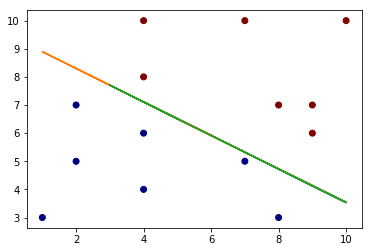

In [130]:
nx=np.array(XX)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

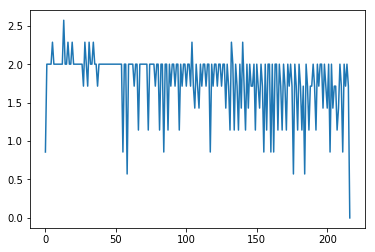

In [131]:
plt.plot(avgL )  
plt.show()

<b>Task_4: Train a perceptron on Iris Data</b>
* First 100 data will be used.
* Only the first two features will be used for this task.

* Your implementation should correctly classify all the data.
* Plot the prediction, decision and loss history.

In [132]:
from sklearn import datasets   

In [134]:
datas=datasets.load_iris()
X=datas['data'][:100]      #first two class only.
y=datas['target'][:100]
# print(X.shape, y.shape)

X=X[:,:2]  #first two column.
print('X:',X.shape, '  y:',y.shape)
for i in range(0,len(y)):
    if y[i]==0:
        y[i]=-1

X: (100, 2)   y: (100,)


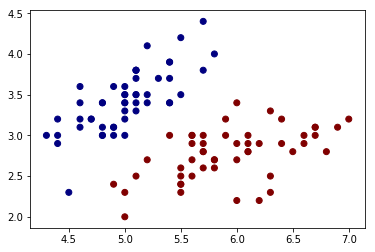

In [135]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet') 
plt.show()

In [136]:
#your code goes here.

In [137]:
def perT(XX, y):
    w = np.random.rand(3)

    y_head=pred(XX,w)
    miss=miss_class(y_head,y) 
    eta=0.1
   
    loss=[]
    for i in range(50000):
        if len(miss)==0: 
            break
        rnd=np.random.choice(miss)
        rx=XX[rnd]
        ry=y[rnd]
        w=w+eta*(rx*ry)
        loss.append(w)
        y_head=pred(XX,w)
        miss=miss_class(y_head,y)
        
    return w
w=perT(XX,y)
print(w)


In [138]:
w=perT(XX,y)
print(w)

[-11.41892229   6.96306639  -8.66659798]


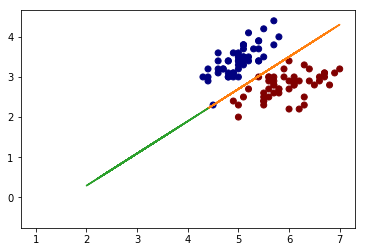

In [139]:
nx=np.array(XX)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

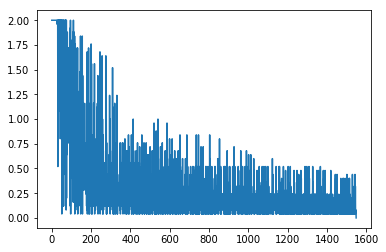

In [140]:
plt.plot(avgL )  
plt.show()

### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Kutub uddin</u> bearing registration no. <u>170103020047</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Kutub uddin</u><br>
Date: <u>14/7/2020</u>

_your__writing_
